## Binomial distribution

#### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

#### Q1) For the random variable below that follows a binomial distribution corresponding to the given number of trials n, and probability of success p, find the probability of seeing x successes

a) n = 12, p = 3/4, x = 10

In [13]:
from scipy.stats import binom
import numpy as np
np.random.seed(42)
n = 12
p = 0.75
x = 10
mean, var = binom.stats(n, p)
binom.pmf(x, n, p)

0.23229324817657435

#### Q2) Is it unusual to see less than 3 heads in 12 flips of a coin? Why?

In [46]:
n = 12
p = 0.5
n_heads = 2
binom.cdf(n_heads, n, p)

0.019287109375000007

## Poisson distribution

A DVD has a defect on average every 2 inches along its track. What is the probability of seeing less than 3 defects within a 5 inch section of its track?


In [47]:
from scipy.stats import poisson
lam = 5/2
poisson.cdf(2,lam)

0.5438131158833297

## Histograms

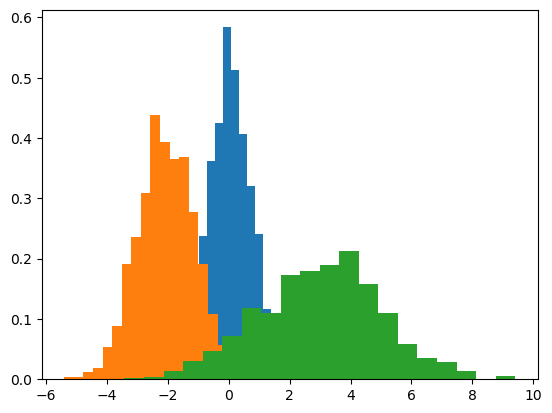

In [49]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.7, density=True, bins=20)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

####  The average salary for first-year teachers is 27,989 USD. Assume the distribution is approximately normal with standard deviation 3250 USD.

What is the probability that a randomly selected first-year teacher has a salary less than 20,000 USD?

What is the probability that a randomly selected first-year teacher makes between 20,000 USD and 30,000 USD each year?



In [50]:
import scipy.stats as st

mu, std = 27989, 3250

std_normal_2 = (20000-mu)/std 

print(st.norm.cdf(0))
print(st.norm.cdf(std_normal_2))


0.5
0.006982666701149653


In [51]:
std_normal_3 = (30000-mu)/std 

prob_2_3 = st.norm.cdf(std_normal_3) - st.norm.cdf(std_normal_2)
print(prob_2_3)

0.7249831358225932


### Men's heights are normally distributed with a mean of 69.0 inches and a standard deviation of 2.8 inches, while women's heights are normally distributed with a mean of 63.6 inches and a standard deviation of 2.5 inches.

1- What percentage of men must duck when walking through a door that is 72 inches high?

2- What percentage of women must duck when walking through a door that is 72 inches high?

3- What door height would allow at least 95% of men to walk through the door without ducking?

In [52]:
mu_men, std_men = 69, 2.8
mu_women, std_women = 63.6, 2.5

print(1- st.norm.cdf((72-mu_men)/std_men))
print(1- st.norm.cdf((72-mu_women)/std_women))


0.1419883858754558
0.0003897123625820065


In [53]:
prob_95 = st.norm.ppf(0.95)
print(prob_95)
door_height = prob_95 * std_men + mu_men
print(door_height)

1.6448536269514722
73.60559015546413


# Linear Regression

## Given two variables $\textit{x}$ and $\textit{y}$, we want to test if there is a linear relationship. In other terms, we want to test if we can describe the relation between the variables can be described by: 

## $y = mx + b + e$
## where $m$ is the coefficient, $b$ is the intercept term, and $e$ is the noise. 

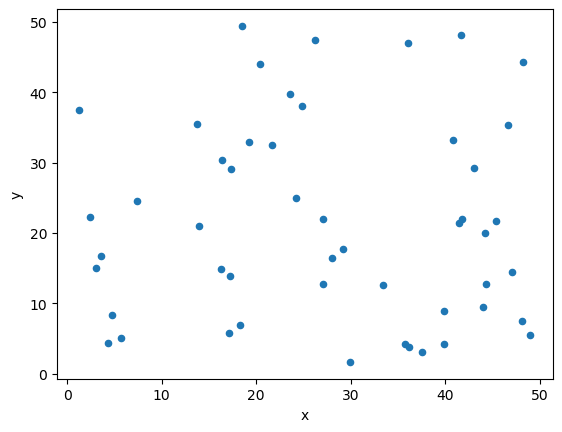

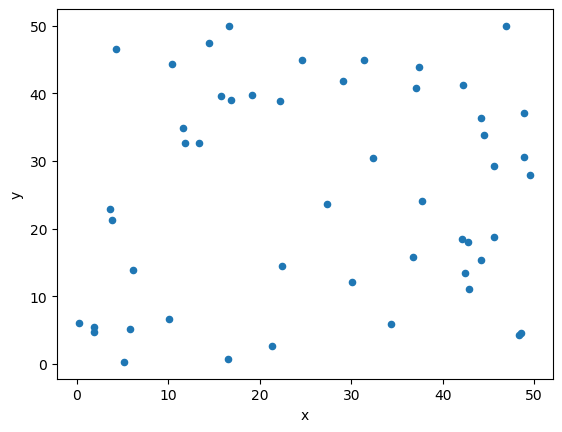

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Generate two random variables, same size
x1 = 50 * np.random.random_sample(size = 50)
y1 = 50 * np.random.random_sample(size = 50)
# Store variables in a dataframe
data1 = pd.DataFrame({'x':x1, 'y':y1})

# Plot the dataset
data1.plot.scatter(x = 'x', y = 'y')
plt.show()

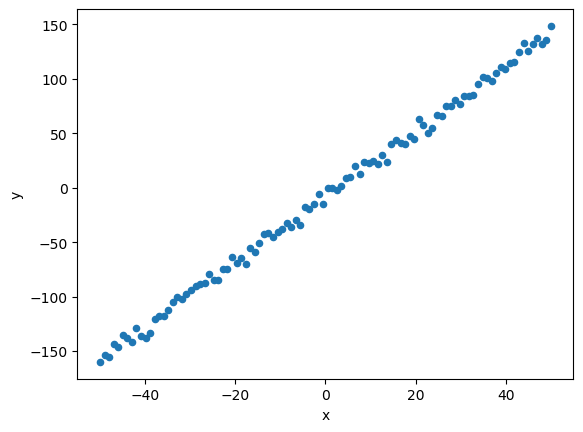

In [7]:
#Generate two related variables
x2 = np.linspace(-50, 50, 100)
y2 = -8 + 3*x2 + 5*np.random.normal(size = x2.shape)
# Store variables in a dataframe
data2 = pd.DataFrame({'x':x2, 'y':y2})

# Plot the dataset
data2.plot.scatter(x = 'x', y = 'y')
plt.show()

## Use OLS by Statsmodel to find the coefficients


In [8]:
import statsmodels.api as sm
x2 = sm.add_constant(x2)

results = sm.OLS(y2, x2).fit()

print(results.summary())
results.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.689e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          4.38e-128
Time:                        22:54:26   Log-Likelihood:                -292.43
No. Observations:                 100   AIC:                             588.9
Df Residuals:                      98   BIC:                             594.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9392      0.455    -17.442      0.0

array([-7.93918539,  2.99827461])

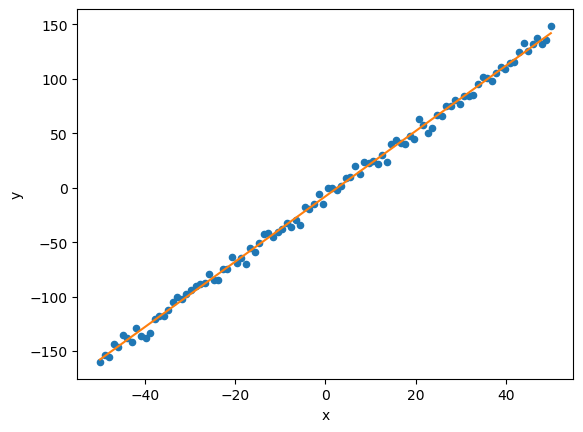

In [9]:
b_hat, m_hat = results.params
y_hat = m_hat * x2 + b_hat
data2.plot.scatter(x = 'x', y = 'y')
plt.plot(x2, y_hat)
plt.show()

### Linear regression using scikit-learn library
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [40]:
from sklearn import linear_model
x2 = np.linspace(-50, 50, 100)
y2 = -8 + 3*x2 + 5*np.random.normal(size = x2.shape)
reg = linear_model.LinearRegression()
reg.fit(x2, y2)

ValueError: Expected 2D array, got 1D array instead:
array=[-50.         -48.98989899 -47.97979798 -46.96969697 -45.95959596
 -44.94949495 -43.93939394 -42.92929293 -41.91919192 -40.90909091
 -39.8989899  -38.88888889 -37.87878788 -36.86868687 -35.85858586
 -34.84848485 -33.83838384 -32.82828283 -31.81818182 -30.80808081
 -29.7979798  -28.78787879 -27.77777778 -26.76767677 -25.75757576
 -24.74747475 -23.73737374 -22.72727273 -21.71717172 -20.70707071
 -19.6969697  -18.68686869 -17.67676768 -16.66666667 -15.65656566
 -14.64646465 -13.63636364 -12.62626263 -11.61616162 -10.60606061
  -9.5959596   -8.58585859  -7.57575758  -6.56565657  -5.55555556
  -4.54545455  -3.53535354  -2.52525253  -1.51515152  -0.50505051
   0.50505051   1.51515152   2.52525253   3.53535354   4.54545455
   5.55555556   6.56565657   7.57575758   8.58585859   9.5959596
  10.60606061  11.61616162  12.62626263  13.63636364  14.64646465
  15.65656566  16.66666667  17.67676768  18.68686869  19.6969697
  20.70707071  21.71717172  22.72727273  23.73737374  24.74747475
  25.75757576  26.76767677  27.77777778  28.78787879  29.7979798
  30.80808081  31.81818182  32.82828283  33.83838384  34.84848485
  35.85858586  36.86868687  37.87878788  38.88888889  39.8989899
  40.90909091  41.91919192  42.92929293  43.93939394  44.94949495
  45.95959596  46.96969697  47.97979798  48.98989899  50.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
x2 = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)
print(x2.shape, y2.shape)
reg.fit(x2, y2)
print(reg.intercept_, reg.coef_)

(100, 1) (100, 1)
[-8.57652799] [[3.01691333]]


### Curve fitting


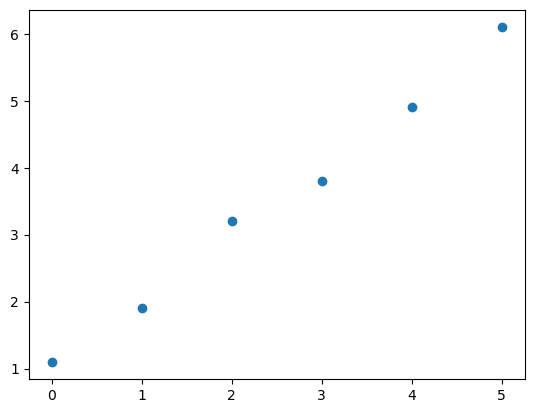

In [10]:
# Generate artificial data plus some noise.

xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,5.1])
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])
plt.scatter(xdata, ydata+sigma)
plt.show()

In [14]:
# Let's fit to a second degree function
import scipy.optimize as optimization
def func(x, a, b, c):
    return a + b*x + c*x*x

x0    = np.array([0.0, 0.0, 0.0])
print (optimization.curve_fit(func, xdata, ydata, x0, sigma))


(array([0.1       , 0.88142857, 0.02142857]), array([[ 0.02753741, -0.0197551 ,  0.0029932 ],
       [-0.0197551 ,  0.02436463, -0.0044898 ],
       [ 0.0029932 , -0.0044898 ,  0.00089796]]))


What is the return of the function?
Check: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


In [15]:
paramaeter_estimates,_ = optimization.curve_fit(func, xdata, ydata, x0, sigma)
print(paramaeter_estimates)

[0.1        0.88142857 0.02142857]
